In [11]:
import os
import sys
import json

from math import *

import matplotlib.pyplot as plt
import numpy as np

# Add root folder of the project in sys.path
module_path = os.path.abspath(os.path.join('..'))  # Up on one level higher 
if module_path not in sys.path:
    sys.path.append(module_path)

from plot_results import PrepareData, Calculations, PlotResults

In [12]:
# Create a list with of amounts of data for all experiments
data_amounts = [0, 1000, 2000, 3000, 4000, 5000, 10000, 15000, 20433]

# Create class instances
prepData = PrepareData()
calc = Calculations()
plot = PlotResults()

## Experiment 4 - MLP, 3 hidden layers

In [13]:
# Define global variabels fror the first experiment
base_path_exp4 = "/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/california_dataset/california_output/exp_5(1)/weights_graphs_mlp"
layers_num_exp4 = 3

In [ ]:
# barcode_layers_exp4 = prepData.load_barcode_data(amounts=data_amounts, base_path=base_path_exp4)

In [15]:
for i in range(1, 6):
    if i == 1:
        barcode_layers_curr_1 = prepData.load_barcode_data(amounts=data_amounts, base_path=f"/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/california_dataset/california_output/exp_5({i})/weights_graphs_mlp")
    elif i == 2:
        barcode_layers_curr_2 = prepData.load_barcode_data(amounts=data_amounts, base_path=f"/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/california_dataset/california_output/exp_5({i})/weights_graphs_mlp")  
    elif i == 3:      
        barcode_layers_curr_3 = prepData.load_barcode_data(amounts=data_amounts, base_path=f"/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/california_dataset/california_output/exp_5({i})/weights_graphs_mlp")    
    elif i == 4:    
        barcode_layers_curr_4 = prepData.load_barcode_data(amounts=data_amounts, base_path=f"/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/california_dataset/california_output/exp_5({i})/weights_graphs_mlp")    
    elif i == 5:    
        barcode_layers_curr_5 = prepData.load_barcode_data(amounts=data_amounts, base_path=f"/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/california_dataset/california_output/exp_5({i})/weights_graphs_mlp")    

### Mean lifetime

In [21]:
# Create a list to store mean lifetimes per layers and per data amounts
layers_homologies_ml_curr_1 = list()
layers_homologies_ml_curr_2 = list()
layers_homologies_ml_curr_3 = list()
layers_homologies_ml_curr_4 = list()
layers_homologies_ml_curr_5 = list()

exps = [barcode_layers_curr_1, barcode_layers_curr_2, barcode_layers_curr_3, barcode_layers_curr_4, barcode_layers_curr_5]
hmt_exps = [layers_homologies_ml_curr_1, layers_homologies_ml_curr_2, layers_homologies_ml_curr_3, layers_homologies_ml_curr_4, layers_homologies_ml_curr_5]

# Fill in created list
num = 0
for exp in exps:
    for i in range(layers_num_exp4):
        h_layer = list()
        for batch in data_amounts:
            h_layer.append(calc.calculate_homology_mean_lifetime(exp[batch][i]))
        hmt_exps[num].append(h_layer)
    num += 1

total_layers_homologies_ml_curr = list()
layer_num = 0
for nums in range(layers_num_exp4):
    total_layers_homologies_ml_curr.append([(hmt_exps[0][layer_num][i] + hmt_exps[1][layer_num][i] + hmt_exps[2][layer_num][i] + hmt_exps[3][layer_num][i] + hmt_exps[4][layer_num][i]) / 5 for i in range(len(hmt_exps[0][layer_num]))])
    layer_num += 1

# plot.plot_graphs_grid(data_amounts=data_amounts, layers=layers_homologies_ml_exp6, label='Mean lifetime', layers_num=layers_num_exp6)

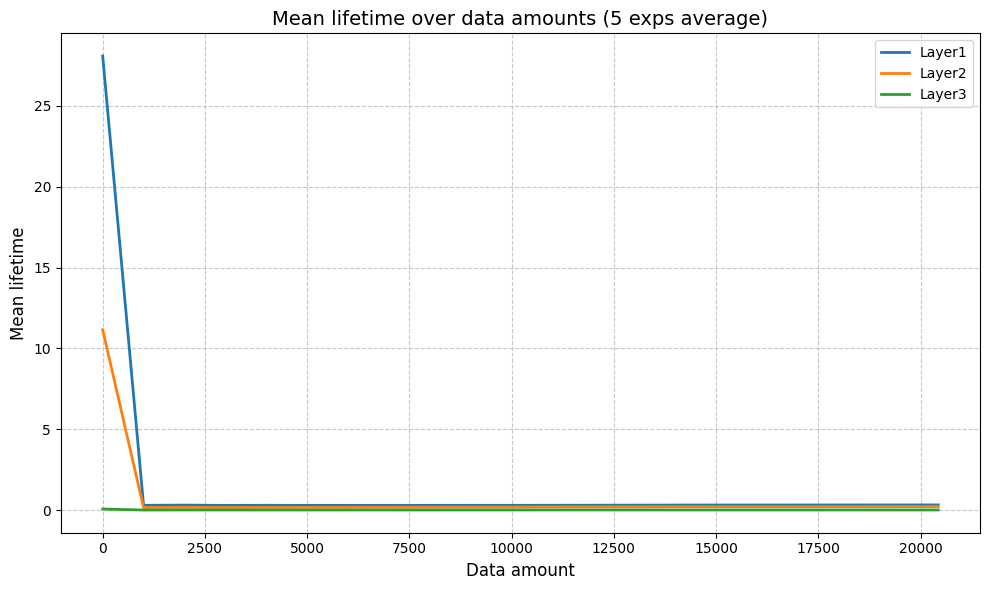

In [22]:
# Data preparation
plt.figure(figsize=(10, 6))
plt.plot(data_amounts, total_layers_homologies_ml_curr[0], markersize=8, linewidth=2, label='Layer1')
plt.plot(data_amounts, total_layers_homologies_ml_curr[1], markersize=8, linewidth=2, label='Layer2')
plt.plot(data_amounts, total_layers_homologies_ml_curr[2], markersize=8, linewidth=2, label='Layer3')
plt.xlabel('Data amount', fontsize=12)
plt.ylabel('Mean lifetime', fontsize=12)
plt.title('Mean lifetime over data amounts (5 exps average)', fontsize=14)
plt.grid(True, which="both", linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

### Norm persist entropy

In [23]:
# # Create a list to store mean lifetimes per layers and per data amounts
# layers_norm_entropy_exp4 = list()

# # Fill in created list
# for q in range(layers_num_exp4):
#     layer_norm_ent = list()
#     for batch in data_amounts:
#         layer_norm_ent.append(calc.calculate_norm_persist_entropy(barcode_layers_exp4[batch][q]))
#     layers_norm_entropy_exp4.append(layer_norm_ent)

# plot.plot_graphs_grid(data_amounts=data_amounts, layers=layers_norm_entropy_exp4, label='Norm entropy', layers_num=layers_num_exp4)

In [24]:
# Create a list to store mean lifetimes per layers and per data amounts
layers_norm_entropy_curr_1 = list()
layers_norm_entropy_curr_2 = list()
layers_norm_entropy_curr_3 = list()
layers_norm_entropy_curr_4 = list()
layers_norm_entropy_curr_5 = list()

exps = [barcode_layers_curr_1, barcode_layers_curr_2, barcode_layers_curr_3, barcode_layers_curr_4, barcode_layers_curr_5]
ne_exps = [layers_norm_entropy_curr_1, layers_norm_entropy_curr_2, layers_norm_entropy_curr_3, layers_norm_entropy_curr_4, layers_norm_entropy_curr_5]

# Fill in created list
num = 0
for exp in exps:
    for q in range(layers_num_exp4):
        layer_norm_ent = list()
        for batch in data_amounts:
                layer_norm_ent.append(calc.calculate_norm_persist_entropy(exp[batch][q]))
        ne_exps[num].append(layer_norm_ent)
    num += 1

total_layers_norm_entropty_curr = list()
layer_num = 0
for nums in range(layers_num_exp4):
    total_layers_norm_entropty_curr.append([(ne_exps[0][layer_num][i] + ne_exps[1][layer_num][i] + ne_exps[2][layer_num][i] + ne_exps[3][layer_num][i] + ne_exps[4][layer_num][i]) / 5 for i in range(len(hmt_exps[0][layer_num]))])
    layer_num += 1

# plot.plot_graphs_grid(data_amounts=data_amounts, layers=layers_homologies_ml_exp6, label='Mean lifetime', layers_num=layers_num_exp6)

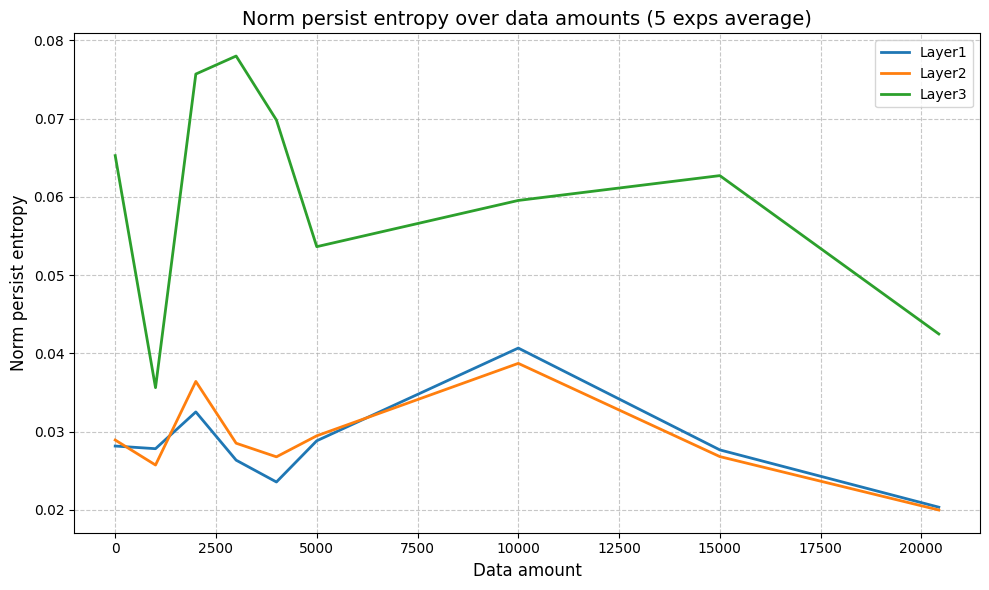

In [25]:
# Data preparation
plt.figure(figsize=(10, 6))
plt.plot(data_amounts, total_layers_norm_entropty_curr[0], markersize=8, linewidth=2, label='Layer1')
plt.plot(data_amounts, total_layers_norm_entropty_curr[1], markersize=8, linewidth=2, label='Layer2')
plt.plot(data_amounts, total_layers_norm_entropty_curr[2], markersize=8, linewidth=2, label='Layer3')
plt.xlabel('Data amount', fontsize=12)
plt.ylabel('Norm persist entropy', fontsize=12)
plt.title('Norm persist entropy over data amounts (5 exps average)', fontsize=14)
plt.grid(True, which="both", linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [26]:
curr_exp_1_mse = dict()
curr_exp_2_mse = dict()
curr_exp_3_mse = dict()
curr_exp_4_mse = dict()
curr_exp_5_mse = dict()

for i in range(1, 6):
    base_path_losses = f"/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/california_dataset/california_output/exp_5({i})/weights_graphs_mlp"
    data_amounts_new = data_amounts[1:]
    for data in data_amounts_new:
        with open(base_path_losses+'_DataAmount'+str(data)+'/barcodes/mse_test.json', 'rt', encoding='utf-8') as file:
            mse = json.load(file)
            
        if i==1:
            curr_exp_1_mse.setdefault(data, mse['epoch100'])
        elif i==2:
            curr_exp_2_mse.setdefault(data, mse['epoch100'])
        elif i==3:
            curr_exp_3_mse.setdefault(data, mse['epoch100'])
        elif i==4:
            curr_exp_4_mse.setdefault(data, mse['epoch100'])
        elif i==5:
            curr_exp_5_mse.setdefault(data, mse['epoch100'])

In [27]:
total_mse = dict()

for data in data_amounts[1:]:
    total_mse[data] = (curr_exp_1_mse[data] + curr_exp_2_mse[data] + curr_exp_3_mse[data] + curr_exp_4_mse[data] + curr_exp_5_mse[data]) / 5

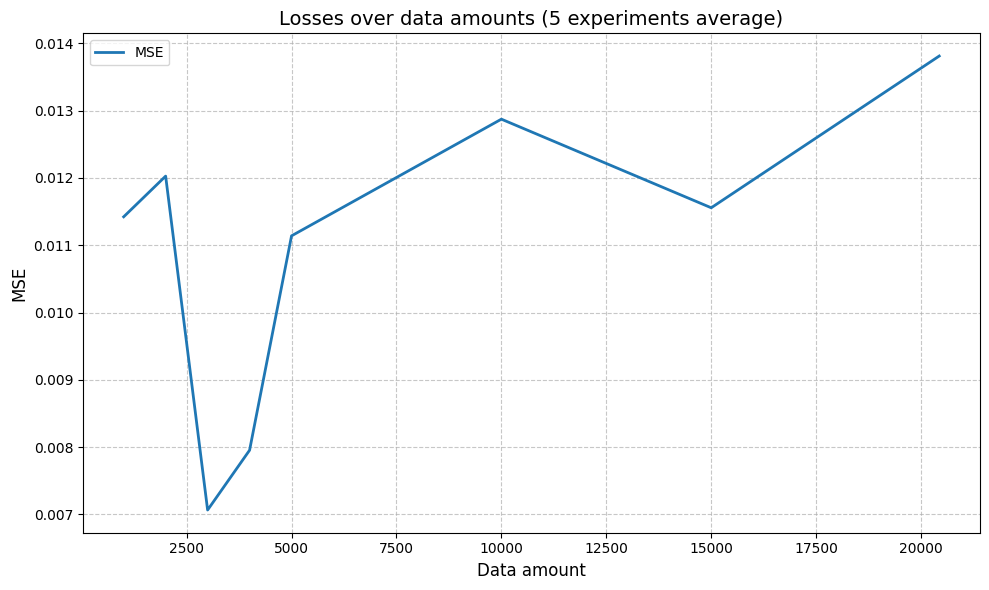

In [28]:
# Data preparation
mse_x = list(total_mse.keys())
mse_y = list(total_mse.values())

plt.figure(figsize=(10, 6))
plt.plot(mse_x, mse_y, markersize=8, linewidth=2, label='MSE')
plt.xlabel('Data amount', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Losses over data amounts (5 experiments average)', fontsize=14)
plt.grid(True, which="both", linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [32]:
curr_1_smape = dict()
curr_2_smape = dict()
curr_3_smape = dict()
curr_4_smape = dict()
curr_5_smape = dict()

for i in range(1, 6):
    base_path_losses = f"/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/california_dataset/california_output/exp_5({i})/weights_graphs_mlp"
    data_amounts_new = data_amounts[1:]
    for data in data_amounts_new:
        with open(base_path_losses+'_DataAmount'+str(data)+'/barcodes/smape_test_data.json', 'rt', encoding='utf-8') as file:
            smape = json.load(file)
            
        if i==1:
            curr_1_smape.setdefault(data, smape['epoch100'])
        elif i==2:
            curr_2_smape.setdefault(data, smape['epoch100'])
        elif i==3:
            curr_3_smape.setdefault(data, smape['epoch100'])
        elif i==4:
            curr_4_smape.setdefault(data, smape['epoch100'])
        elif i==5:
            curr_5_smape.setdefault(data, smape['epoch100'])

In [33]:
total_smape = dict()

for data in data_amounts[1:]:
    total_smape[data] = (curr_1_smape[data] + curr_2_smape[data] + curr_3_smape[data] + curr_4_smape[data] + curr_5_smape[data]) / 5

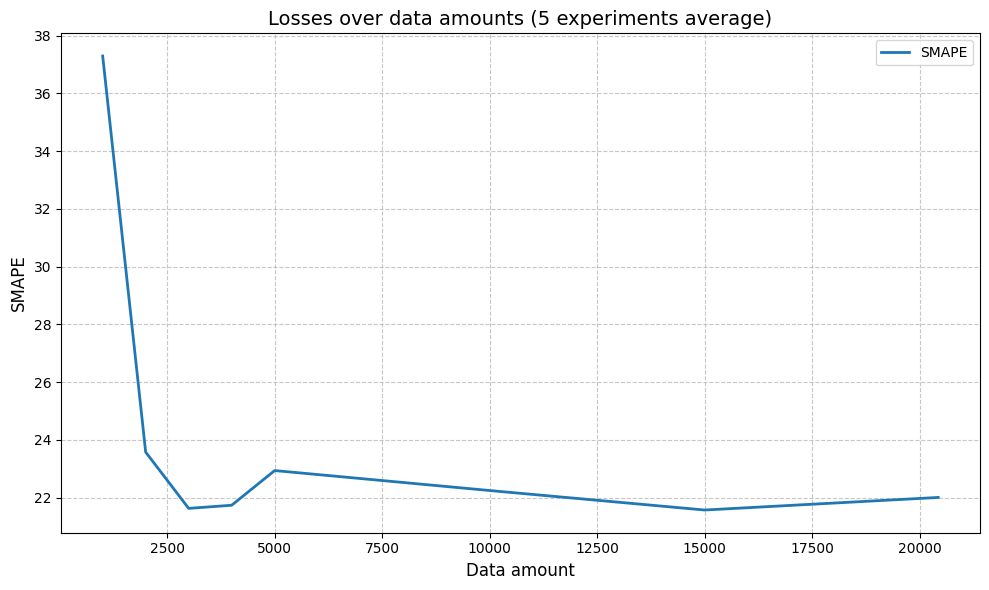

In [34]:
# Data preparation
mse_x = list(total_smape.keys())
mse_y = list(total_smape.values())

plt.figure(figsize=(10, 6))
plt.plot(mse_x, mse_y, markersize=8, linewidth=2, label='SMAPE')
plt.xlabel('Data amount', fontsize=12)
plt.ylabel('SMAPE', fontsize=12)
plt.title('Losses over data amounts (5 experiments average)', fontsize=14)
plt.grid(True, which="both", linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# homology_mt_1000 = calculate_homology_mean_lifetime(barcode_layers_exp4[1000][0])
# homology_mt_5000 = calculate_homology_mean_lifetime(barcode_layers_exp4[5000][0])
# homology_mt_20433 = calculate_homology_mean_lifetime(barcode_layers_exp4[20433][0])

In [44]:
data_calculations = [1000, 10000, 20433]

for i in range(5):
    homology_mt_zero_1 = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_curr_1[0][0])
    homology_mt_zero_2 = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_curr_2[0][0])
    homology_mt_zero_3 = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_curr_3[0][0])
    homology_mt_zero_4 = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_curr_4[0][0])
    homology_mt_zero_5 = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_curr_5[0][0])

    total_zero_homology = (homology_mt_zero_1[1] + homology_mt_zero_2[1] + homology_mt_zero_3[1] + homology_mt_zero_4[1] + homology_mt_zero_5[1]) / 5


homology_mt_min_1 = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_curr_1[data_calculations[0]][0])
homology_mt_min_2 = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_curr_2[data_calculations[0]][0])
homology_mt_min_3 = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_curr_3[data_calculations[0]][0])
homology_mt_min_4 = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_curr_4[data_calculations[0]][0])
homology_mt_min_5 = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_curr_5[data_calculations[0]][0])

min_1, min_2, min_3, min_4, min_5 = list(homology_mt_min_1.values()), list(homology_mt_min_2.values()), list(homology_mt_min_3.values()), list(homology_mt_min_4.values()), list(homology_mt_min_5.values())
total_min = list()
total_min.append(0.35)
for q in range(len(min_1)):
    total_min.append((min_1[q] + min_2[q] + min_3[q] + min_4[q] + min_5[q]) / 5)

homology_mt_ave_1 = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_curr_1[data_calculations[1]][0])
homology_mt_ave_2 = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_curr_2[data_calculations[1]][0])
homology_mt_ave_3 = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_curr_3[data_calculations[1]][0])
homology_mt_ave_4 = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_curr_4[data_calculations[1]][0])
homology_mt_ave_5 = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_curr_5[data_calculations[1]][0])

ave_1, ave_2, ave_3, ave_4, ave_5 = list(homology_mt_ave_1.values()), list(homology_mt_ave_2.values()), list(homology_mt_ave_3.values()), list(homology_mt_ave_4.values()), list(homology_mt_ave_5.values())
total_ave = list()
total_ave.append(0.35)
for q in range(len(ave_1)):
    total_ave.append((ave_1[q] + ave_2[q] + ave_3[q] + ave_4[q] + ave_5[q]) / 5)

homology_mt_max_1 = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_curr_1[data_calculations[2]][0])
homology_mt_max_2 = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_curr_2[data_calculations[2]][0])
homology_mt_max_3 = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_curr_3[data_calculations[2]][0])
homology_mt_max_4 = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_curr_4[data_calculations[2]][0])
homology_mt_max_5 = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_curr_5[data_calculations[2]][0])

max_1, max_2, max_3, max_4, max_5 = list(homology_mt_max_1.values()), list(homology_mt_max_2.values()), list(homology_mt_max_3.values()), list(homology_mt_max_4.values()), list(homology_mt_max_5.values())
total_max = list()
total_max.append(0.35)
for q in range(len(max_1)):
    total_max.append((max_1[q] + max_2[q] + max_3[q] + max_4[q] + max_5[q]) / 5)

epochs = list()
epochs.append(0)
epochs.extend(list(homology_mt_min_1.keys()))

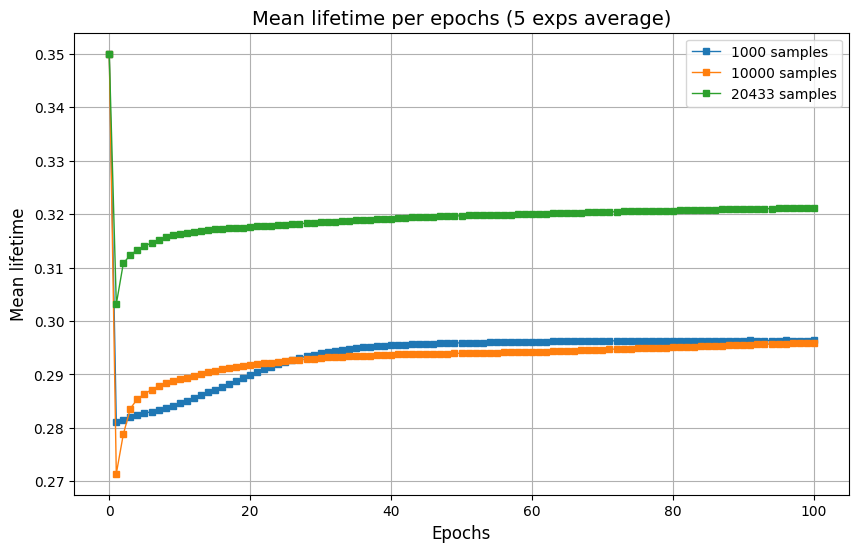

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, total_min, label=f'{data_calculations[0]} samples', marker='s', markersize=5, linewidth=1)
plt.plot(epochs, total_ave, label=f'{data_calculations[1]} samples', marker='s', markersize=5,linewidth=1)
plt.plot(epochs, total_max, label=f'{data_calculations[2]} samples', marker='s', markersize=5,linewidth=1)
plt.title('Mean lifetime per epochs (5 exps average)', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Mean lifetime', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()

In [47]:
data_calculations = [1000, 10000, 20433]

for i in range(5):
    norm_ent_zero_1 = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_curr_1[0][0])
    norm_ent_zero_2 = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_curr_2[0][0])
    norm_ent_zero_3 = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_curr_3[0][0])
    norm_ent_zero_4 = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_curr_4[0][0])
    norm_ent_zero_5 = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_curr_5[0][0])

    total_zero_ent = (norm_ent_zero_1['1'] + norm_ent_zero_2['1'] + norm_ent_zero_3['1'] + norm_ent_zero_4['1'] + norm_ent_zero_5['1']) / 5


norm_ent_min_1 = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_curr_1[data_calculations[0]][0])
norm_ent_min_2 = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_curr_2[data_calculations[0]][0])
norm_ent_min_3 = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_curr_3[data_calculations[0]][0])
norm_ent_min_4 = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_curr_4[data_calculations[0]][0])
norm_ent_min_5 = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_curr_5[data_calculations[0]][0])

min_1, min_2, min_3, min_4, min_5 = list(norm_ent_min_1.values()), list(norm_ent_min_2.values()), list(norm_ent_min_3.values()), list(norm_ent_min_4.values()), list(norm_ent_min_5.values())
total_min = list()
total_min.append(total_zero_ent)
for q in range(len(min_1)):
    total_min.append((min_1[q] + min_2[q] + min_3[q] + min_4[q] + min_5[q]) / 5)

norm_ent_ave_1 = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_curr_1[data_calculations[1]][0])
norm_ent_ave_2 = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_curr_2[data_calculations[1]][0])
norm_ent_ave_3 = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_curr_3[data_calculations[1]][0])
norm_ent_ave_4 = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_curr_4[data_calculations[1]][0])
norm_ent_ave_5 = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_curr_5[data_calculations[1]][0])

ave_1, ave_2, ave_3, ave_4, ave_5 = list(norm_ent_ave_1.values()), list(norm_ent_ave_2.values()), list(norm_ent_ave_3.values()), list(norm_ent_ave_4.values()), list(norm_ent_ave_5.values())
total_ave = list()
total_ave.append(total_zero_ent)
for q in range(len(ave_1)):
    total_ave.append((ave_1[q] + ave_2[q] + ave_3[q] + ave_4[q] + ave_5[q]) / 5)

norm_ent_max_1 = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_curr_1[data_calculations[2]][0])
norm_ent_max_2 = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_curr_2[data_calculations[2]][0])
norm_ent_max_3 = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_curr_3[data_calculations[2]][0])
norm_ent_max_4 = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_curr_4[data_calculations[2]][0])
norm_ent_max_5 = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_curr_5[data_calculations[2]][0])

max_1, max_2, max_3, max_4, max_5 = list(norm_ent_max_1.values()), list(norm_ent_max_2.values()), list(norm_ent_max_3.values()), list(norm_ent_max_4.values()), list(norm_ent_max_5.values())
total_max = list()
total_max.append(total_zero_ent)
for q in range(len(max_1)):
    total_max.append((max_1[q] + max_2[q] + max_3[q] + max_4[q] + max_5[q]) / 5)

epochs = list()
epochs.append(0)
epochs.extend(list(norm_ent_min_1.keys()))

In [ ]:
# norm_ent_1000 = calculate_norm_persist_entropy(barcode_layers_exp4[1000][0])
# norm_ent_5000 = calculate_norm_persist_entropy(barcode_layers_exp4[5000][0])
# norm_ent_20433 = calculate_norm_persist_entropy(barcode_layers_exp4[20433][0])

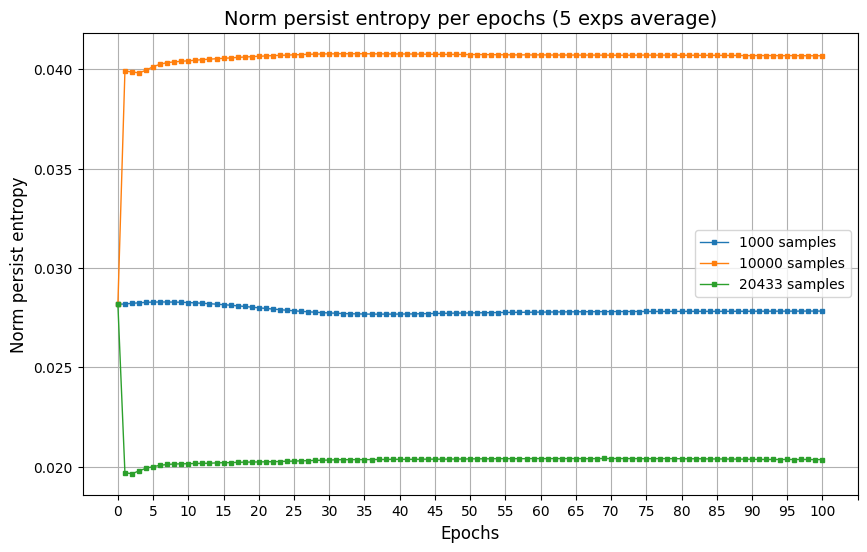

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, total_min, label=f'{data_calculations[0]} samples', marker='s', markersize=3, linewidth=1)
plt.plot(epochs, total_ave, label=f'{data_calculations[1]} samples', marker='s', markersize=3,linewidth=1)
plt.plot(epochs, total_max, label=f'{data_calculations[2]} samples', marker='s', markersize=3,linewidth=1)
plt.title('Norm persist entropy per epochs (5 exps average)', fontsize=14)
plt.xticks(np.arange(0, 106, 5))  # шаг 2 по оси X
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Norm persist entropy', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()

In [66]:
curr_exp_1_mse_1000 = dict()
curr_exp_2_mse_1000 = dict()
curr_exp_3_mse_1000 = dict()
curr_exp_4_mse_1000 = dict()
curr_exp_5_mse_1000 = dict()

data = [1000, 10000, 20433]

for i in range(1, 6):
    base_path_losses = f"/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/california_dataset/california_output/exp_5({i})/weights_graphs_mlp"
    for epoch in range(100):
        with open(base_path_losses+'_DataAmount'+str(data[0])+'/barcodes/mse_test.json', 'rt', encoding='utf-8') as file:
            mse_1000 = json.load(file)
            
        if i==1:
            curr_exp_1_mse_1000.setdefault(epoch, mse_1000[f'epoch{epoch+1}'])
        elif i==2:
            curr_exp_2_mse_1000.setdefault(epoch, mse_1000[f'epoch{epoch+1}'])
        elif i==3:
            curr_exp_3_mse_1000.setdefault(epoch, mse_1000[f'epoch{epoch+1}'])
        elif i==4:
            curr_exp_4_mse_1000.setdefault(epoch, mse_1000[f'epoch{epoch+1}'])
        elif i==5:
            curr_exp_5_mse_1000.setdefault(epoch, mse_1000[f'epoch{epoch+1}'])

In [67]:
total_mse_1000 = dict()

for epoch in range(100):
    total_mse_1000[epoch+1] = (curr_exp_1_mse_1000[epoch] + curr_exp_2_mse_1000[epoch] + curr_exp_3_mse_1000[epoch] + curr_exp_4_mse_1000[epoch] + curr_exp_5_mse_1000[epoch]) / 5

In [68]:
curr_exp_1_mse_10000 = dict()
curr_exp_2_mse_10000 = dict()
curr_exp_3_mse_10000 = dict()
curr_exp_4_mse_10000 = dict()
curr_exp_5_mse_10000 = dict()

data = [1000, 10000, 20433]

for i in range(1, 6):
    base_path_losses = f"/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/california_dataset/california_output/exp_5({i})/weights_graphs_mlp"
    for epoch in range(100):
        with open(base_path_losses+'_DataAmount'+str(data[1])+'/barcodes/mse_test.json', 'rt', encoding='utf-8') as file:
            mse_10000 = json.load(file)
            
        if i==1:
            curr_exp_1_mse_10000.setdefault(epoch, mse_10000[f'epoch{epoch+1}'])
        elif i==2:
            curr_exp_2_mse_10000.setdefault(epoch, mse_10000[f'epoch{epoch+1}'])
        elif i==3:
            curr_exp_3_mse_10000.setdefault(epoch, mse_10000[f'epoch{epoch+1}'])
        elif i==4:
            curr_exp_4_mse_10000.setdefault(epoch, mse_10000[f'epoch{epoch+1}'])
        elif i==5:
            curr_exp_5_mse_10000.setdefault(epoch, mse_10000[f'epoch{epoch+1}'])

In [69]:
total_mse_10000 = dict()

for epoch in range(100):
    total_mse_10000[epoch+1] = (curr_exp_1_mse_10000[epoch] + curr_exp_2_mse_10000[epoch] + curr_exp_3_mse_10000[epoch] + curr_exp_4_mse_10000[epoch] + curr_exp_5_mse_10000[epoch]) / 5

In [70]:
curr_exp_1_mse_20433 = dict()
curr_exp_2_mse_20433 = dict()
curr_exp_3_mse_20433 = dict()
curr_exp_4_mse_20433 = dict()
curr_exp_5_mse_20433 = dict()

data = [1000, 10000, 20433]

for i in range(1, 6):
    base_path_losses = f"/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/california_dataset/california_output/exp_5({i})/weights_graphs_mlp"
    for epoch in range(100):
        with open(base_path_losses+'_DataAmount'+str(data[2])+'/barcodes/mse_test.json', 'rt', encoding='utf-8') as file:
            mse_20433 = json.load(file)
            
        if i==1:
            curr_exp_1_mse_20433.setdefault(epoch, mse_20433[f'epoch{epoch+1}'])
        elif i==2:
            curr_exp_2_mse_20433.setdefault(epoch, mse_20433[f'epoch{epoch+1}'])
        elif i==3:
            curr_exp_3_mse_20433.setdefault(epoch, mse_20433[f'epoch{epoch+1}'])
        elif i==4:
            curr_exp_4_mse_20433.setdefault(epoch, mse_20433[f'epoch{epoch+1}'])
        elif i==5:
            curr_exp_5_mse_20433.setdefault(epoch, mse_20433[f'epoch{epoch+1}'])

In [71]:
total_mse_20433 = dict()

for epoch in range(100):
    total_mse_20433[epoch+1] = (curr_exp_1_mse_20433[epoch] + curr_exp_2_mse_20433[epoch] + curr_exp_3_mse_20433[epoch] + curr_exp_4_mse_20433[epoch] + curr_exp_5_mse_20433[epoch]) / 5

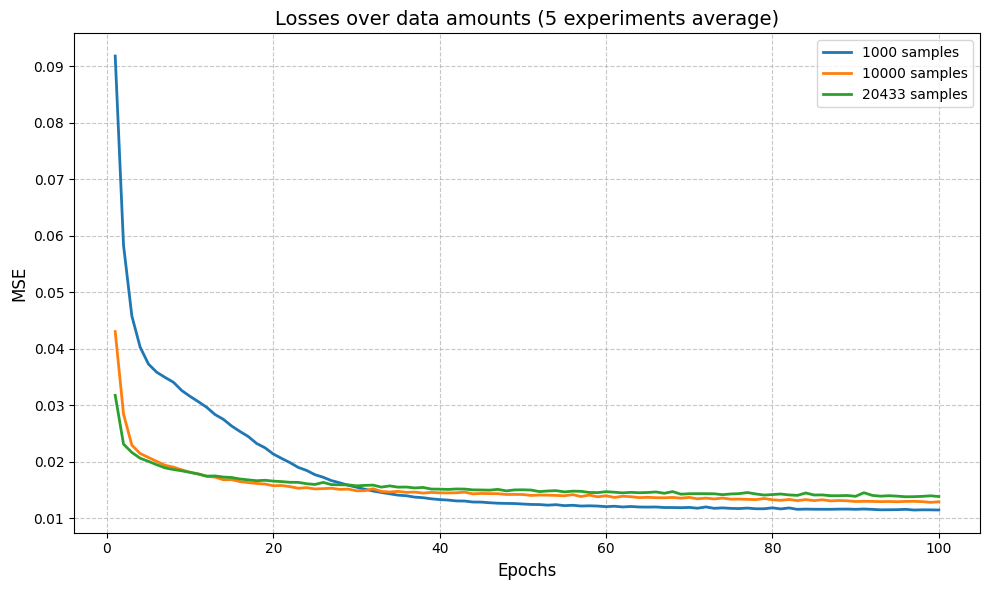

In [72]:
# Data preparation
plt.figure(figsize=(10, 6))
plt.plot(list(total_mse_1000.keys()), list(total_mse_1000.values()), markersize=8, linewidth=2, label='1000 samples')
plt.plot(list(total_mse_10000.keys()), list(total_mse_10000.values()), markersize=8, linewidth=2, label='10000 samples')
plt.plot(list(total_mse_20433.keys()), list(total_mse_20433.values()), markersize=8, linewidth=2, label='20433 samples')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Losses over data amounts (5 experiments average)', fontsize=14)
plt.grid(True, which="both", linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
curr_exp_1_smape_1000 = dict()
curr_exp_2_smape_1000 = dict()
curr_exp_3_smape_1000 = dict()
curr_exp_4_smape_1000 = dict()
curr_exp_5_smape_1000 = dict()

data = [1000, 10000, 20433]

for i in range(1, 6):
    base_path_losses = f"/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/california_dataset/california_output/exp_5({i})/weights_graphs_mlp"
    for epoch in range(100):
        with open(base_path_losses+'_DataAmount'+str(data[0])+'/barcodes/smape_test_data.json', 'rt', encoding='utf-8') as file:
            smape_1000 = json.load(file)
            
        if i==1:
            curr_exp_1_smape_1000.setdefault(epoch, smape_1000[f'epoch{epoch+1}'])
        elif i==2:
            curr_exp_2_smape_1000.setdefault(epoch, smape_1000[f'epoch{epoch+1}'])
        elif i==3:
            curr_exp_3_smape_1000.setdefault(epoch, smape_1000[f'epoch{epoch+1}'])
        elif i==4:
            curr_exp_4_smape_1000.setdefault(epoch, smape_1000[f'epoch{epoch+1}'])
        elif i==5:
            curr_exp_5_smape_1000.setdefault(epoch, smape_1000[f'epoch{epoch+1}'])

In [76]:
total_smape_1000 = dict()

for epoch in range(100):
    total_smape_1000[epoch+1] = (curr_exp_1_smape_1000[epoch] + curr_exp_2_smape_1000[epoch] + curr_exp_3_smape_1000[epoch] + curr_exp_4_smape_1000[epoch] + curr_exp_5_smape_1000[epoch]) / 5

In [ ]:
curr_exp_1_smape_10000 = dict()
curr_exp_2_smape_10000 = dict()
curr_exp_3_smape_10000 = dict()
curr_exp_4_smape_10000 = dict()
curr_exp_5_smape_10000 = dict()

data = [1000, 10000, 20433]

for i in range(1, 6):
    base_path_losses = f"/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/california_dataset/california_output/exp_5({i})/weights_graphs_mlp"
    for epoch in range(100):
        with open(base_path_losses+'_DataAmount'+str(data[1])+'/barcodes/smape_test_data.json', 'rt', encoding='utf-8') as file:
            smape_10000 = json.load(file)
            
        if i==1:
            curr_exp_1_smape_10000.setdefault(epoch, smape_10000[f'epoch{epoch+1}'])
        elif i==2:
            curr_exp_2_smape_10000.setdefault(epoch, smape_10000[f'epoch{epoch+1}'])
        elif i==3:
            curr_exp_3_smape_10000.setdefault(epoch, smape_10000[f'epoch{epoch+1}'])
        elif i==4:
            curr_exp_4_smape_10000.setdefault(epoch, smape_10000[f'epoch{epoch+1}'])
        elif i==5:
            curr_exp_5_smape_10000.setdefault(epoch, smape_10000[f'epoch{epoch+1}'])

In [78]:
total_smape_10000 = dict()

for epoch in range(100):
    total_smape_10000[epoch+1] = (curr_exp_1_smape_10000[epoch] + curr_exp_2_smape_10000[epoch] + curr_exp_3_smape_10000[epoch] + curr_exp_4_smape_10000[epoch] + curr_exp_5_smape_10000[epoch]) / 5

In [79]:
curr_exp_1_smape_20433 = dict()
curr_exp_2_smape_20433 = dict()
curr_exp_3_smape_20433 = dict()
curr_exp_4_smape_20433 = dict()
curr_exp_5_smape_20433 = dict()

data = [1000, 10000, 20433]

for i in range(1, 6):
    base_path_losses = f"/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/california_dataset/california_output/exp_5({i})/weights_graphs_mlp"
    for epoch in range(100):
        with open(base_path_losses+'_DataAmount'+str(data[2])+'/barcodes/smape_test_data.json', 'rt', encoding='utf-8') as file:
            smape_20433 = json.load(file)
            
        if i==1:
            curr_exp_1_smape_20433.setdefault(epoch, smape_20433[f'epoch{epoch+1}'])
        elif i==2:
            curr_exp_2_smape_20433.setdefault(epoch, smape_20433[f'epoch{epoch+1}'])
        elif i==3:
            curr_exp_3_smape_20433.setdefault(epoch, smape_20433[f'epoch{epoch+1}'])
        elif i==4:
            curr_exp_4_smape_20433.setdefault(epoch, smape_20433[f'epoch{epoch+1}'])
        elif i==5:
            curr_exp_5_smape_20433.setdefault(epoch, smape_20433[f'epoch{epoch+1}'])

In [80]:
total_smape_20433 = dict()

for epoch in range(100):
    total_smape_20433[epoch+1] = (curr_exp_1_smape_20433[epoch] + curr_exp_2_smape_20433[epoch] + curr_exp_3_smape_20433[epoch] + curr_exp_4_smape_20433[epoch] + curr_exp_5_smape_20433[epoch]) / 5

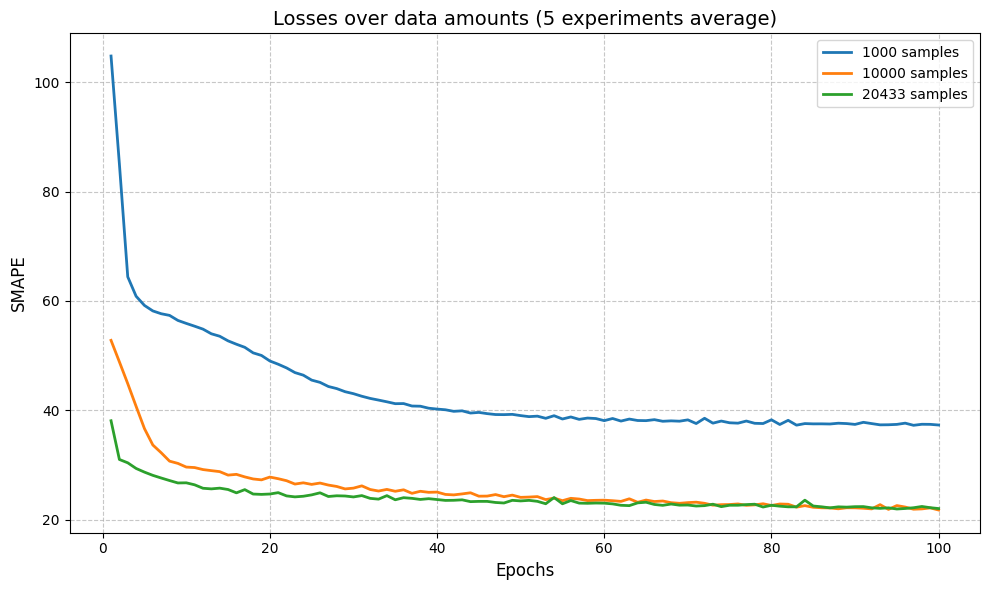

In [81]:
# Data preparation
plt.figure(figsize=(10, 6))
plt.plot(list(total_smape_1000.keys()), list(total_smape_1000.values()), markersize=8, linewidth=2, label='1000 samples')
plt.plot(list(total_smape_10000.keys()), list(total_smape_10000.values()), markersize=8, linewidth=2, label='10000 samples')
plt.plot(list(total_smape_20433.keys()), list(total_smape_20433.values()), markersize=8, linewidth=2, label='20433 samples')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('SMAPE', fontsize=12)
plt.title('Losses over data amounts (5 experiments average)', fontsize=14)
plt.grid(True, which="both", linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()